# Implementing MLPs with Keras

- Keras is TensorFlow's high-level deep learning API: 
    - it allows you to build, train, evaluate, and execute all sorts of neural networks. 

### Building an Image Classifier Using the Sequential API

- dataset: fashion MNIST (70,000 grayscale images of 28 x 28 pixels each, with 10 classes)

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [2]:
print(f"type: {type(fashion_mnist)}")
print(f"length: {len(fashion_mnist)}")

type: <class 'tuple'>
length: 2


In [3]:
import numpy as np 

def explore_fashion_mnist_levels(data, level = 0):
    indent = ' ' * level
    if isinstance(data, np.ndarray):
        print(f"{indent} Array: shape = {data.shape}, dtype = {data.dtype}")
    elif isinstance(data, (list, tuple)):
        print(f"{indent}{type(data).__name__} of length {len((data))}")
        for subdata in data:
            explore_fashion_mnist_levels(subdata, level + 1)
    else: 
        print(f"{indent}{type(data).__name__}: {data}")

explore_fashion_mnist_levels(fashion_mnist)

tuple of length 2
 tuple of length 2
   Array: shape = (60000, 28, 28), dtype = uint8
   Array: shape = (60000,), dtype = uint8
 tuple of length 2
   Array: shape = (10000, 28, 28), dtype = uint8
   Array: shape = (10000,), dtype = uint8


It's already shuffled and split into a training set (60,000 images) and a test set (10,000 images)

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [5]:
X_train_full.shape

(60000, 28, 28)

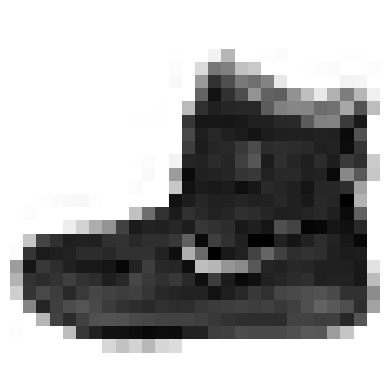

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

Each pixel intensity is represented as a byte (0 to 255):

In [7]:
X_train.dtype

dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [8]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#### some samples from the Fashion MNIST dataset

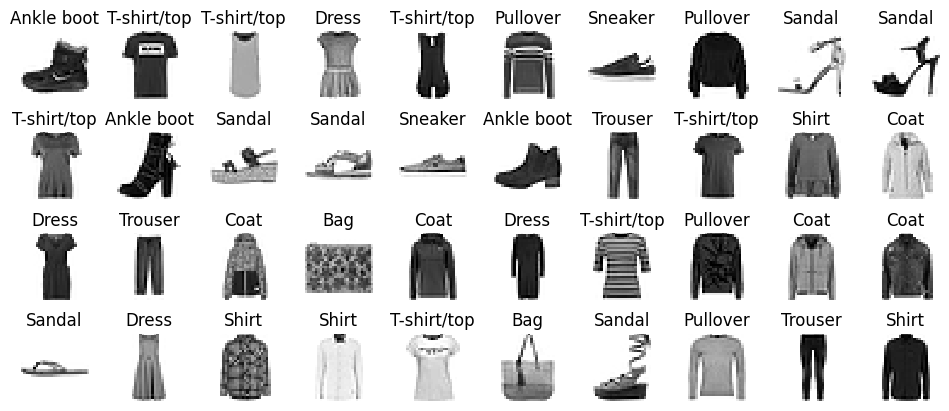

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### Creating the model using the sequential API

In [11]:
# the random weights of the hidden layers and the output layer will be the same every time you run the notebook.
tf.random.set_seed(42)
# create a sequential model. the simplest kind of keras model for NNs that are just composed of a single stack of layers connected sequentially.
model = tf.keras.Sequential()
# the first layer (an input layer).
model.add(tf.keras.layers.Input(shape = [28,28]))
# Flatten Layer to convert each input image into a 1D array.
model.add(tf.keras.layers.Flatten())
# Dense hidden layer with 300 neurons, ReLU activation function.
model.add(tf.keras.layers.Dense(300, activation = "relu"))
# Dense hidden layer with 100 neurons, ReLU activation function.
model.add(tf.keras.layers.Dense(100, activation = "relu"))
# Dense output layer with 10 neurons(one per class), Softmax activation function.
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

All global state managed by Keras is stored in a Keras session, which you can clear using tf.keras.backend.clear_session().
In particular, this resets the name counters

In [12]:
tf.keras.backend.clear_session()

In [13]:
# we can to pass a list of layers when creating the Sequential model.
# you can also drop the input layer and instead specify the input_shape in the first layer:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(300, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

c:\Users\20100\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

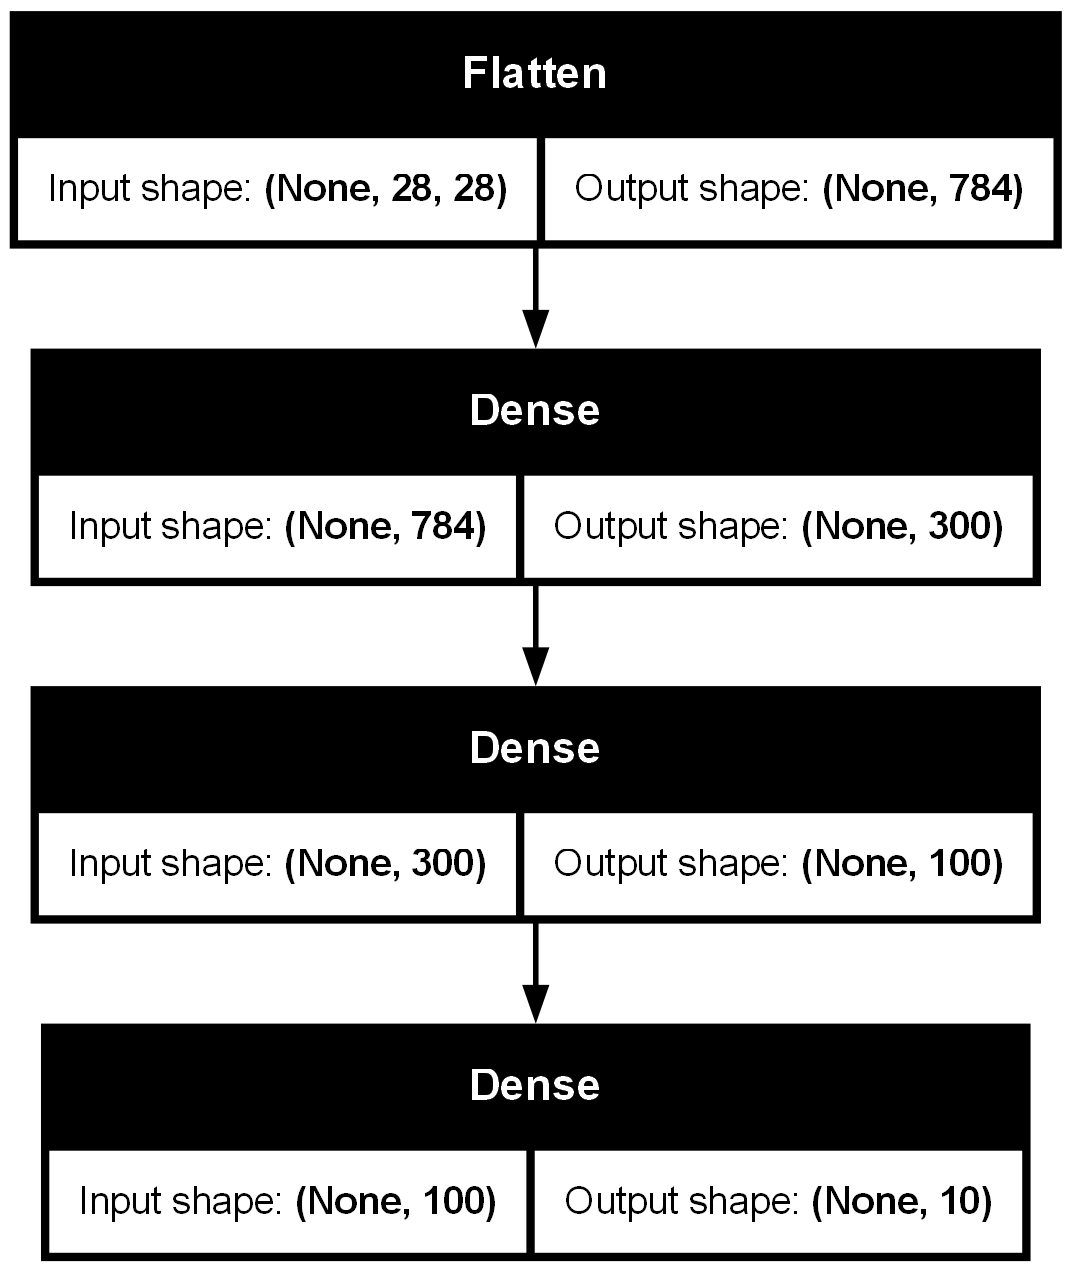

In [15]:
# another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [16]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [17]:
model.layers[1].name

'dense'

In [18]:
weights, biases = model.layers[1].get_weights()

In [19]:
weights

array([[-0.04870439, -0.00956579,  0.05457704, ...,  0.04014965,
        -0.05196927,  0.03648093],
       [-0.05296454, -0.03676747, -0.00521567, ...,  0.0583811 ,
         0.07226817, -0.01615888],
       [ 0.00667334, -0.01897548, -0.02859782, ..., -0.0423068 ,
         0.03948026,  0.0175024 ],
       ...,
       [-0.04254541, -0.00987775, -0.04315221, ...,  0.01947697,
        -0.06128835, -0.01671688],
       [ 0.03927342, -0.01303456,  0.04233879, ...,  0.00807289,
        -0.05902266,  0.00754253],
       [-0.02269454, -0.05091564, -0.04157609, ..., -0.06373575,
        -0.04035668, -0.07194807]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

### Compiling the model

In [25]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

"""
[loss = "sparse_categorical_crossentropy"] == [loss = tf.keras.losses.sparse_categorical_crossentropy]
[optimizer = "sgd"] == [optimizer = tf.keras.optimizers.SGD()]
[metrics = ["accuracy"]] == [metrics = tf.keras.metrics.sparse_categorical_accuracy]
"""

'\n[loss = "sparse_categorical_crossentropy"] == [loss = tf.keras.losses.sparse_categorical_crossentropy]\n[optimizer = "sgd"] == [optimizer = tf.keras.optimizers.SGD()]\n[metrics = ["accuracy"]] == [metrics = tf.keras.metrics.sparse_categorical_accuracy]\n'

Training and evaluatingg the model

In [26]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6919 - loss: 0.9832 - val_accuracy: 0.8272 - val_loss: 0.5034
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8260 - loss: 0.5063 - val_accuracy: 0.8382 - val_loss: 0.4506
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8439 - loss: 0.4521 - val_accuracy: 0.8470 - val_loss: 0.4271
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8540 - loss: 0.4215 - val_accuracy: 0.8530 - val_loss: 0.4134
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8600 - loss: 0.3994 - val_accuracy: 0.8578 - val_loss: 0.4020
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8656 - loss: 0.3819 - val_accuracy: 0.8592 - val_loss: 0.3941
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8697 - loss: 0.3673 - val_accuracy: 0.8616 - val_loss: 0.3863
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8746 - loss: 0.3546 - 

In [27]:
# the batch size is 32 by default, and since the training set has 55,000 images 
55000/32

1718.75

the model goes through 1719 batches per epoch: 1718 of size 32, and 1 of size 24.

In [30]:
# histroy.params  ==> the training parameters.
# history.epoch   ==> the list of epochs it went through.
# history.history ==> the loss and the extra metrics
history.history

{'accuracy': [0.7666181921958923,
  0.8313636183738708,
  0.8469818234443665,
  0.8559636473655701,
  0.8621090650558472,
  0.8672909140586853,
  0.8718000054359436,
  0.8762000203132629,
  0.8792363405227661,
  0.8821454644203186,
  0.8853272795677185,
  0.8877454400062561,
  0.8901636600494385,
  0.8920727372169495,
  0.8945454359054565,
  0.8971636295318604,
  0.8992182016372681,
  0.9014727473258972,
  0.9033272862434387,
  0.9052727222442627,
  0.9073636531829834,
  0.9091818332672119,
  0.9111999869346619,
  0.9128545522689819,
  0.9138908982276917,
  0.9158363342285156,
  0.9169454574584961,
  0.918254554271698,
  0.9198181629180908,
  0.9209818243980408],
 'loss': [0.7098401188850403,
  0.4861516058444977,
  0.4403727352619171,
  0.41262808442115784,
  0.39216676354408264,
  0.3759259879589081,
  0.36218759417533875,
  0.35004812479019165,
  0.33932334184646606,
  0.3295014202594757,
  0.3207075893878937,
  0.31261494755744934,
  0.30502650141716003,
  0.29799777269363403,
  0.

If you use this dictionary to create a Pandas DataFrame and call its plot() method, you get **the learning curves**

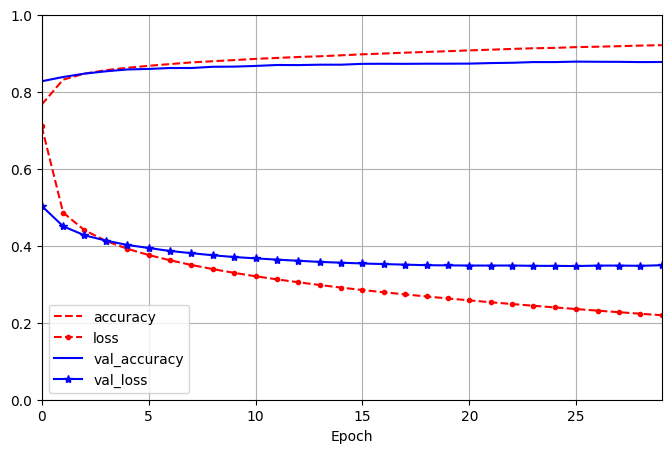

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

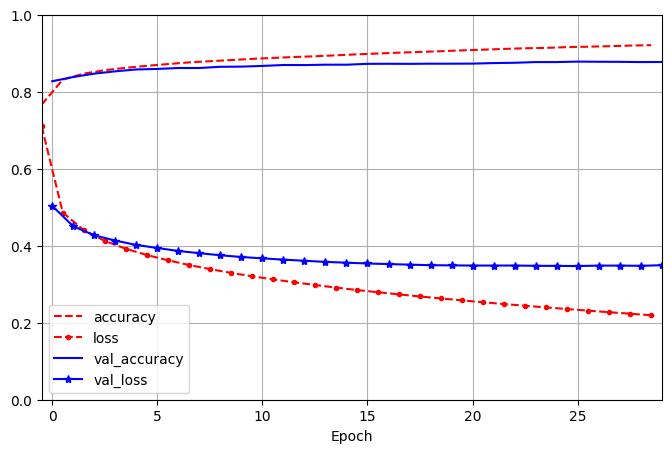

In [34]:
# shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [36]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.8738 - loss: 0.3705


[0.3682117164134979, 0.8737000226974487]

### Using the model to make predictions

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.43, 0.  , 0.02, 0.  , 0.55],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
y_pred = y_proba.argmax(axis = -1)
y_pred

array([9, 2, 1])

In [40]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
y_true = y_test[:3]
y_true

array([9, 2, 1], dtype=uint8)